### ESM2 SDI - Cours de THGR 2020-2021

---------
<center><h1 style="background-color:#c0cfc0;height:50px"> TP5 : Explorations de graphes </h1> </center>

----------


## Exercice 1 :  <span style= "color:#00B8DE">  Parcours de graphe en profondeur et en largeur.

On distingue deux grandes méthodes de parcours de graphes:
- Le parcours en profondeur
#### DEFINITION   <span style= "color:#00B8DE"> « Parcours en profondeur ou DFS (Depth First Search) » :
Un parcours en profondeur d’un graphe $G=(S,A)$  à partir d’un sommet   consiste  à suivre un chemin le plus loin possible à partir de $x$, puis à faire des retours en arrière pour reprendre tous les chemins ignorés précédemment.
    
    Un sommet $y$ n’est définitivement marqué qu’après le début du traitement de ses successeurs.



- Le parcours en largeur
#### DEFINITION   <span style= "color:#00B8DE"> «« Parcours en largeur ou BFS (Breadth First Search) » :
Un parcours en largeur d’un graphe  $G=(S,A)$  à partir d’un sommet   consiste à explorer les sommets du graphe niveau par niveau, à partir du sommet $x$.
    
    Un sommet $y$ est marqué avant le début de traitement de ses successeurs.


### I. Parcours en profondeur

### REMARQUE :
La liste L des sommets à traiter est une Pile de type LIFO (Last In, First Out) :
- On ajoute les éléments par le haut de la pile,
- On retire les éléments par le haut de la pile.



#### 1. Implémentez la fonction " DFSArbre() " qui, à partir du sommet racine d'un arbre retourne la liste des sommets en précisant la date de la première visite et la date quant tous ses fils sont visités.

Pour chaque sommet $x$ on note 
$$dateO(x)=\textit{ la date de la première rencontre avec } x$$
et 
$$dateF(x)=\textit{ la date où le dernier fils de } x \textit{ a été visité et on entame un retour en arrière } $$

In [1]:
# t est une variable globale initialisée à 0
# Procedure DFSArbre(G,x) # x est la racine de l'arbre G
#     dateO(x):=t+1 
#     t:=t+1
#     pour chaque sommet fils y de x faire:
#            DFSArbre(y)
           
#     dateF(x)=t+1
#     t:=t+1

In [2]:
#Réponse
def DFSAbre(G,x, dateO= {},dateF= {},t=0):
    g = G.to_dictionary()
    dateO[x]=t+1
    t+=1
    for y in g[x]:
        if y not in dateO:
            DFSAbre(G,y,dateO,dateF,t)
    dateF[x]=t+1
    t+=1
    return dateO,dateF
    

#### 2. Implémentez les fonctions " DFS() " et " DFS_orienté() " (pour un graphe orienté) qui, partant d'un sommet de votre choix, réalise un parcours en profondeur du graphe et retourne la liste des sommets dans l’ordre de leur rencontre. Considérez les sommets par ordre décroissant.

In [62]:
# REPONSE :
def DFS(G,x,visited ,visitednodelist):
    g = G.to_dictionary()
    visited[x]=True
    visitednodelist.append(x)
    g[x].sort(reverse=True)
    for y in g[x]:
        if y not in visited:
            DFS(G,y,visited,visitednodelist)
    return visitednodelist


def DFS_oriente(G,x,visited_or,node_list):
    g = G.to_dictionary()
    visited_or[x]=True
    node_list.append(x)
    g[x].sort(reverse=True)
    for y in g[x]:
        if y not in visited_or:
            node_set = DFS_oriente(G,y,visited_or,node_list)
    return node_list
    

#### 3. Appliquer ces algorithmes aux graphes $G_1$ et $G_2$ ci-dessus en partant pour $G_1$ du sommet 1 et pour $G_2$ du sommet 8 :

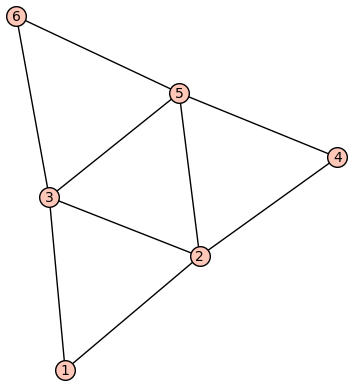

[1, 2, 3, 5, 4, 6]


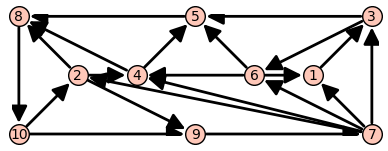

[8, 10, 9, 7, 6, 5, 4, 1, 3, 2] [8, 10, 9, 7, 6, 5, 4, 1, 3, 2]


In [61]:
nodeL = []
visited = {}

visitednodeL = []
visited_or = {}
G1 = Graph([(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (4, 5), (5, 6)])
G1.show()
print(DFS(G1,1,visited,visitednodeL))
pos={1 :[5,1], 2 :[1,1], 3 :[6,2], 4 :[2,1], 5 :[3,2], 6 :[4,1], 7 :[6,0], 8 :[0,2], 9 :[3,0], 10 :[0,0]}
G2 = DiGraph({1:[3], 2:[4, 8, 9], 3:[5,6], 4:[5, 8], 5:[8], 6:[1, 4, 5], 7:[1,2,3,4,6], 8:[10], 9:[7], 10:[2, 9]})
G2.show(pos=pos, save_pos=True)
print(DFS_oriente(G2,8,visited_or,nodeL),list(G2.depth_first_search(start=8)))


In [5]:
# REPONSE :

#### 4. Exécuter la celulle ci-dessous et comparer. Comment expliquez-vous la différence ?

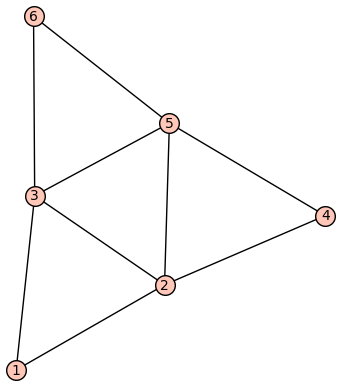

[1, 2, 3, 5, 4, 6]


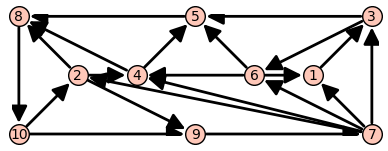

[8, 10, 2, 9, 4, 7, 5, 1, 3, 6]


In [38]:
G1 = Graph([(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (4, 5), (5, 6)])
G1.show()
print (G1.lex_BFS(initial_vertex=1))

pos={1 :[5,1], 2 :[1,1], 3 :[6,2], 4 :[2,1], 5 :[3,2], 6 :[4,1], 7 :[6,0], 8 :[0,2], 9 :[3,0], 10 :[0,0]}
G2 = DiGraph({1:[3], 2:[4, 8, 9], 3:[5,6], 4:[5, 8], 5:[8], 6:[1, 4, 5], 7:[1,2,3,4,6], 8:[10], 9:[7], 10:[2, 9]})
G2.show(pos=pos, save_pos=True)
print (G2.lex_BFS(initial_vertex=8),)

In [7]:
# REPONSE :


### II. Parcours en largeur

#### 1. Implémentez la fonction " BFS() " qui, à partir d'un sommet de votre choix, réalise un parcours en largeur du graphe et retourne la liste des sommets dans l’ordre de leur première rencontre. En cas de choix, choisir le sommet ayant le plus petit identifiant.


### REMARQUE :
La liste L des sommets à traiter est une file de type FIFO (First In, First Out) :
- On ajoute les éléments par le bas de la file,
- On retire les éléments par le haut de la file.


In [39]:
# REPONSE :
def BFS(G,x):
    g = G.to_dictionary()
    visited = {}
    visitednode_list = []
    visited[x]=True
    visitednode_list.append(x)
    queue = [x]
    g[x].sort()
    while queue:
        x = queue.pop(0)
        for y in g[x]:
            if y not in visited:
                visited[y]=True
                visitednode_list.append(y)
                queue.append(y)
    return visitednode_list

#### 2. Appliquer cette fonction au graphe $G_1$ ci-dessous en partant du sommet 1 :

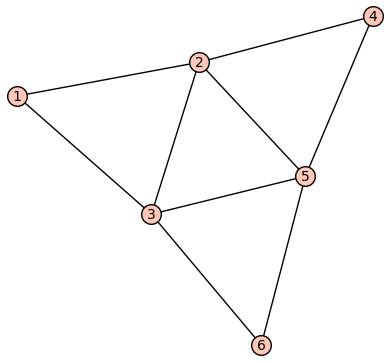

[1, 2, 3, 4, 5, 6]

In [40]:
# REPONSE :
G1 = Graph([(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (4, 5), (5, 6)])
G1.show()

BFS(G1,1)

#### 3. Implémentez la fonction " BFS_orienté() " qui, à partir d'un sommet de votre choix, réalise un parcours en largeur du graphe orienté et retourne la liste des sommets dans l’ordre de leur première rencontre. En cas de choix, choisir le sommet ayant le plus petit identifiant.

In [57]:
# REPONSE :
def BFS_oriente(G,x):
    g = G.to_dictionary()
    visited = {}
    visitednode_list = []
    visited[x]=True
    visitednode_list.append(x)
    queue = [x]
    while queue:
        x = queue.pop(0)
        for y in g[x]:
            if y not in visited:
                visited[y]=True
                visitednode_list.append(y)
                queue.append(y)
    return visitednode_list

#### 4. Appliquer cette fonction au graphe $G_2$ ci-dessous en partant du sommet 8 :

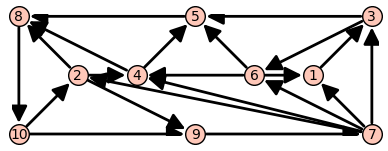

([8, 10, 9, 2, 7, 4, 1, 3, 6, 5], [8, 10, 9, 7, 6, 5, 4, 1, 3, 2])

In [58]:
# REPONSE :
pos={1 :[5,1], 2 :[1,1], 3 :[6,2], 4 :[2,1], 5 :[3,2], 6 :[4,1], 7 :[6,0], 8 :[0,2], 9 :[3,0], 10 :[0,0]}
G2 = DiGraph({1:[3], 2:[4, 8, 9], 3:[5,6], 4:[5, 8], 5:[8], 6:[1, 4, 5], 7:[1,2,3,4,6], 8:[10], 9:[7], 10:[2, 9]})
G2.show(pos=pos, save_pos=True)

BFS_oriente(G2,8)
# [8, 10, 2, 9, 4, 7, 5, 1, 3, 6]


### III.   Application du parcours en profondeur : composantes fortement connexes
### <span style= "color:#00B8DE">  Algorithme de Kosaraju 
####  Entrée:  Un graphe $G$  orienté
#### Sortie: Ses composantes fortement connexes

- Effectuer un parcours en profondeur de $G$, en stockant les sommets dans l’ordre de leur date de fin de parcours $d_f$ dans une liste $L$. 
- Effectuer un parcours en profondeur de $^tG$ mais dans la boucle principale du parcours, prendre les sommets par date $d_f$ décroissante. 

Chaque parcours élémentaire fournit une composante fortement connexe.

### Rappel 

$^tG$  est  le graphe obtenu à partir du graphe $G$ en inversant les arcs,

In [76]:
def DFS(graph, v, visited,order):
 
    visited[v] = True
 
    for u in graph[v]:
        if u not in visited:
            DFS(graph, u, visited,order)
    order.append(v)
    
def DFS2(graph, v, visited,order):
 
    visited[v] = True
    order.append(v)
    for u in graph[v]:
        if u not in visited:
            DFS(graph, u, visited,order)
    return order

def kosaraju(G):
    """
    Kosaraju's algorithm for computing strongly connected components.
    """
    # Step 1: Reverse the graph
    G_rev = G.reverse()
    
    vis = {}
    order = []

    # Step 2: Run DFS on the reversed graph
    for v in G_rev.vertices():
        if v not in vis:
            DFS(G_rev.to_dictionary(),v,vis,order)
            


    # Step 3: Run DFS on the original graph
    components =[]
    for v in order:
        visited = {}
        temp = []
        component = DFS2(G.to_dictionary(),v,visited,temp)
        components.append(component)

    return components


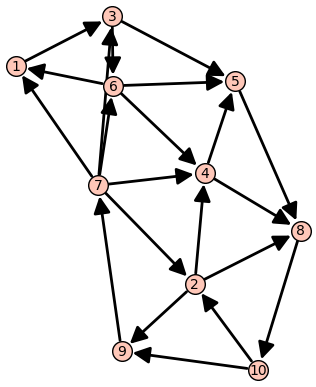

[[2, 5, 4, 6, 3, 1, 7, 9, 10, 8],
 [4, 5, 6, 3, 1, 2, 7, 9, 10, 8],
 [5, 4, 6, 3, 1, 2, 7, 9, 10, 8],
 [8, 5, 4, 6, 3, 1, 2, 7, 9, 10],
 [10, 8, 5, 4, 6, 3, 1, 2, 7, 9],
 [9, 4, 2, 10, 8, 5, 6, 3, 1, 7],
 [7, 9, 4, 2, 10, 8, 5, 6, 3, 1],
 [3, 1, 4, 2, 6, 7, 9, 10, 8, 5],
 [6, 4, 2, 7, 9, 10, 8, 5, 3, 1],
 [1, 4, 2, 6, 7, 9, 10, 8, 5, 3]]

In [77]:
G2 = DiGraph({1:[3], 2:[4, 8, 9], 3:[5,6], 4:[5, 8], 5:[8], 6:[1, 4, 5], 7:[1,2,3,4,6], 8:[10], 9:[7], 10:[2, 9]})
G2.show()
kosaraju(G2)

### Fin du TP